# Support Vector Machines
### by Joshua Rodriguez
**Instructions**
Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
df = pd.read_excel('ENB2012_data.xlsx')
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


#### TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample


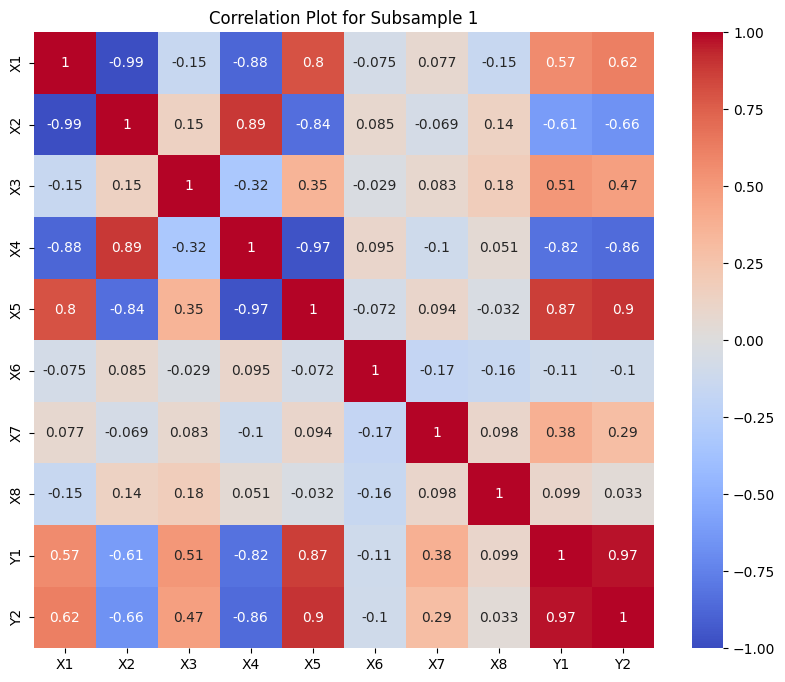

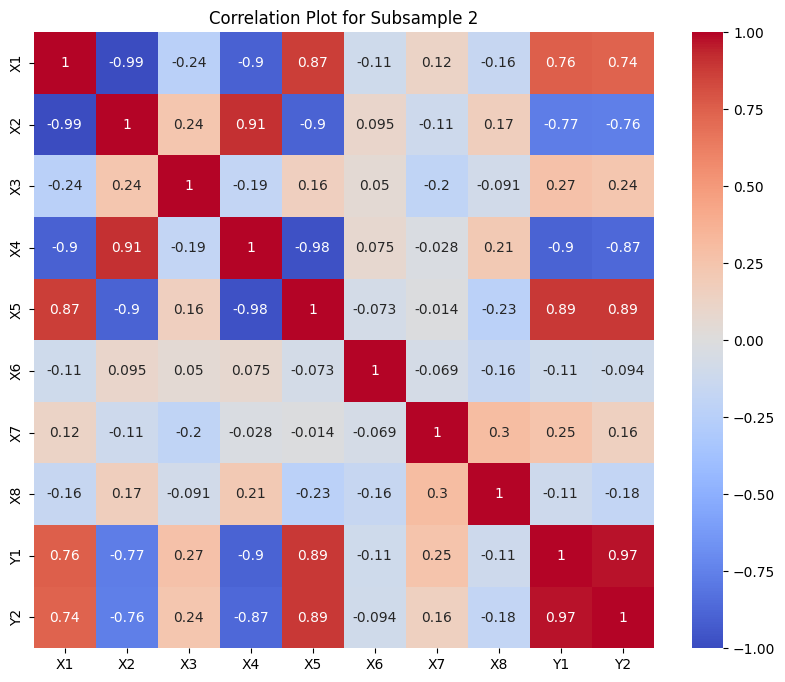

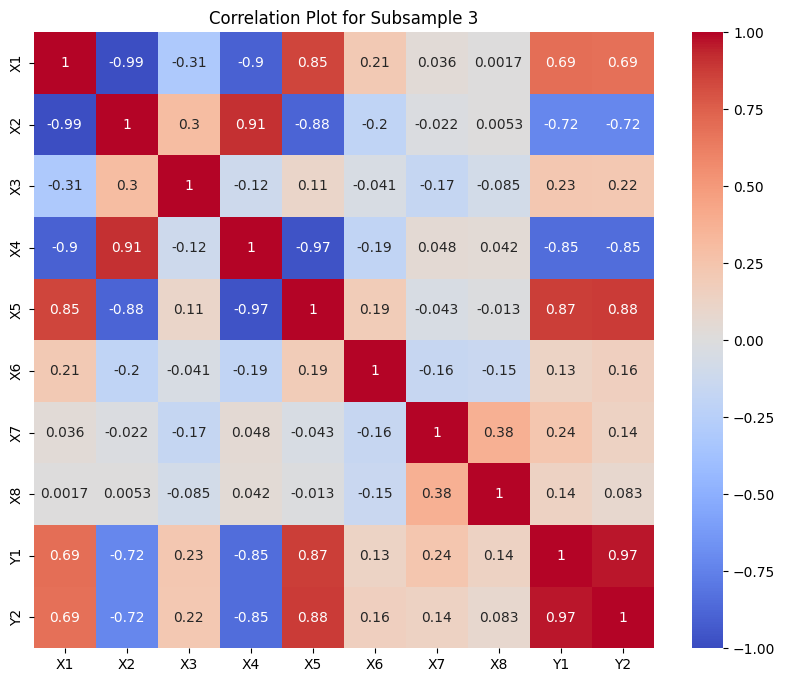

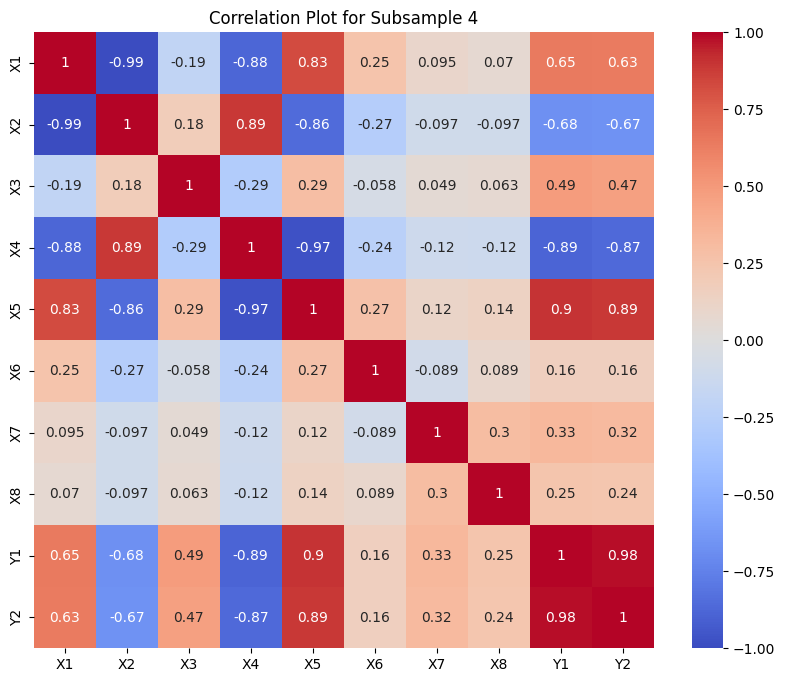

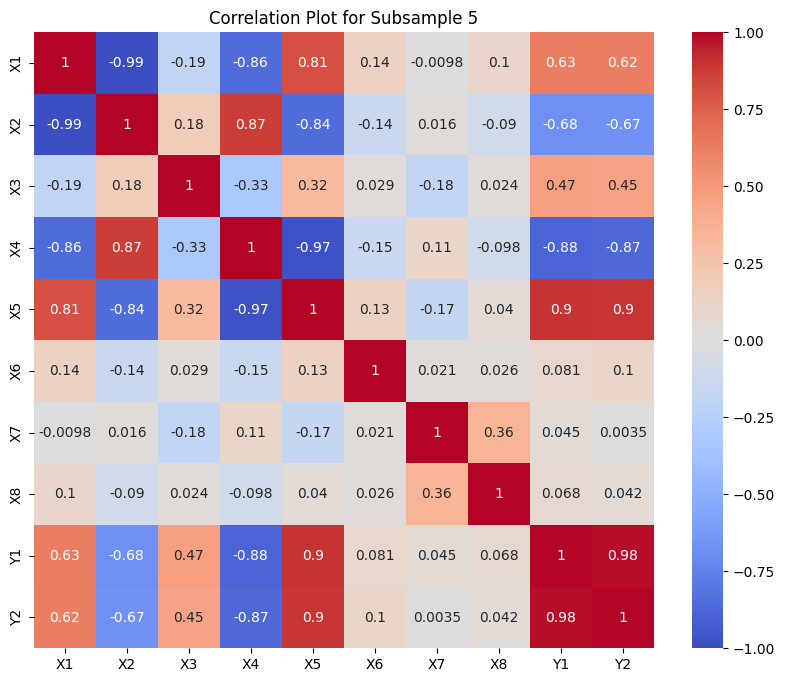

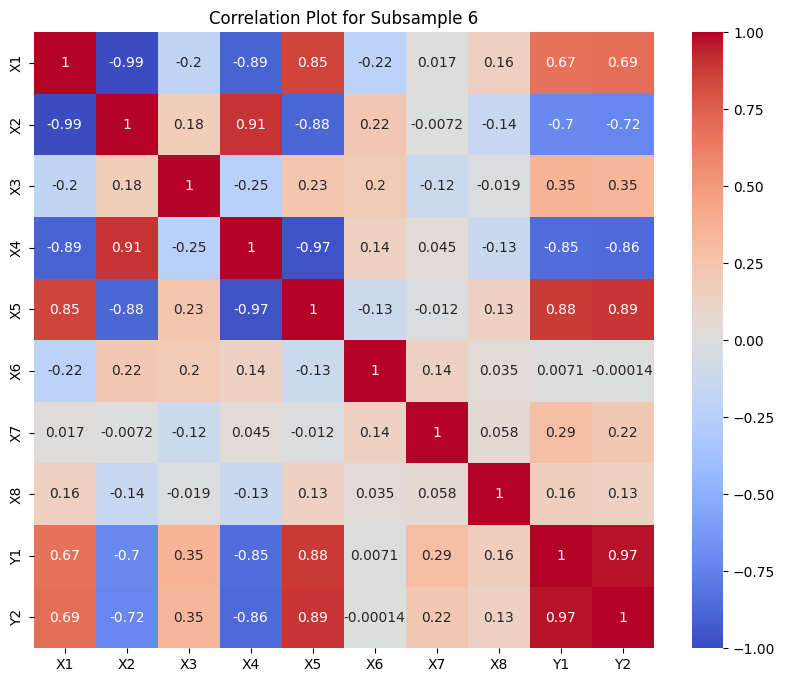

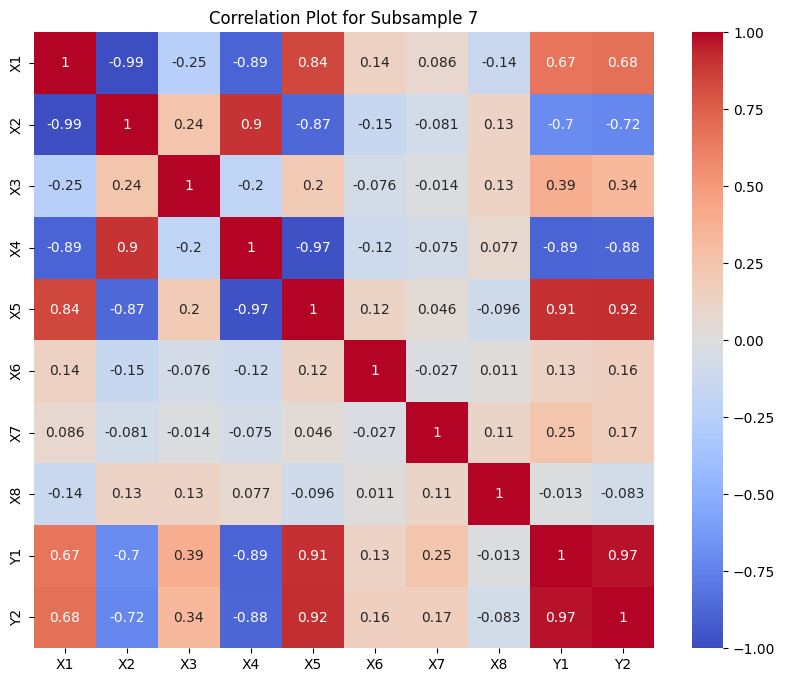

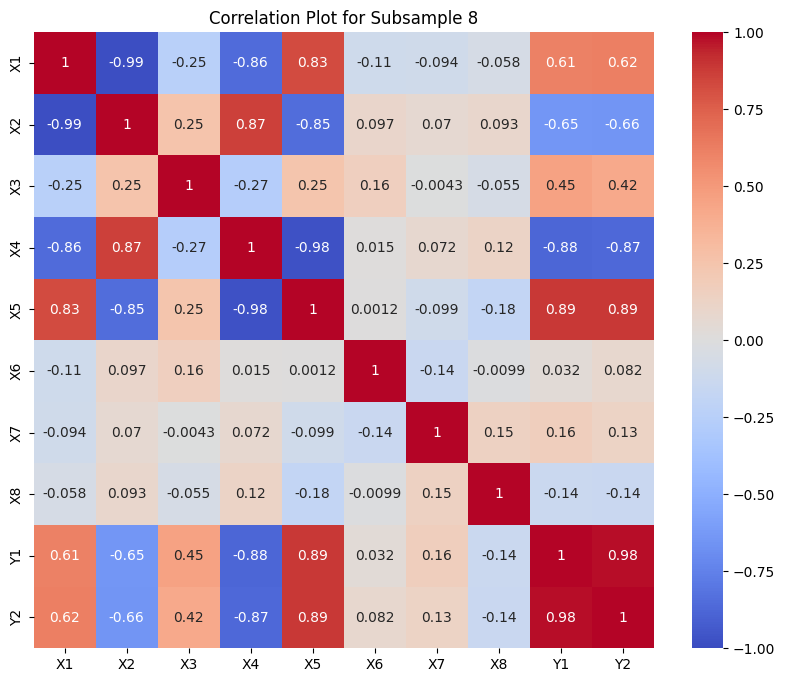

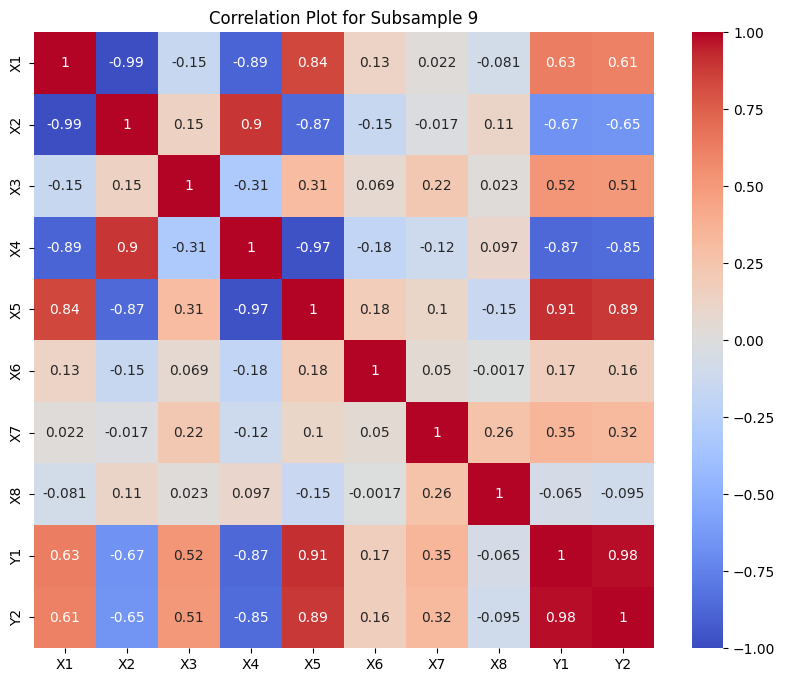

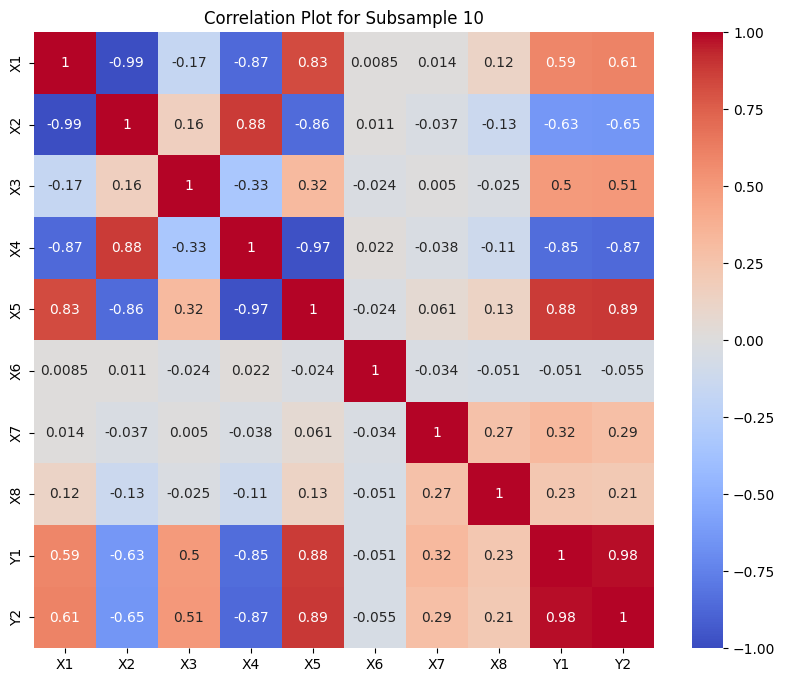

In [2]:

num_subsamples = 10
subsample_size = len(df) // num_subsamples

def create_correlation_plot(data, sample_number):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Plot for Subsample {sample_number}')
    plt.show()

for i in range(num_subsamples):
    subsample = df.sample(n=subsample_size, random_state=i)
    create_correlation_plot(subsample, i + 1)

### TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced 

### TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe

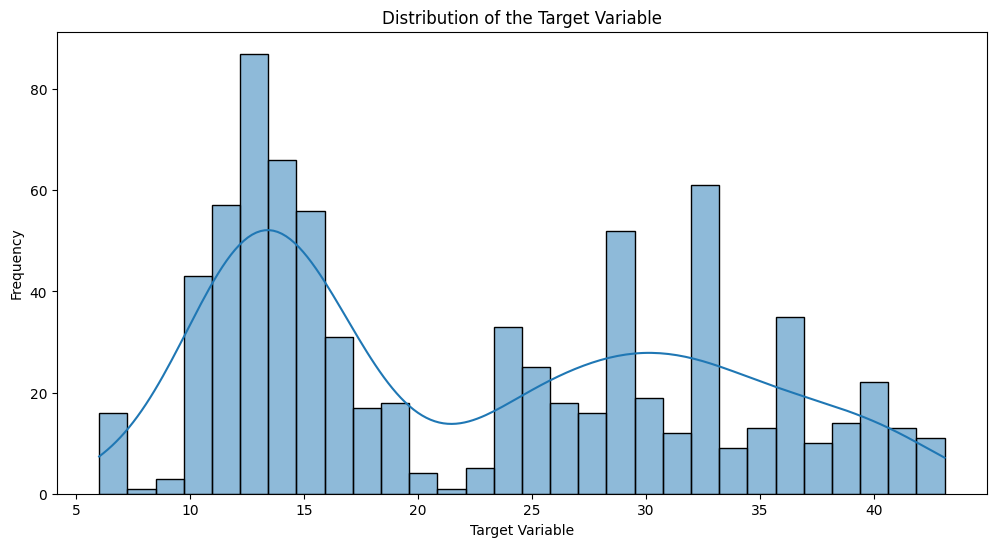

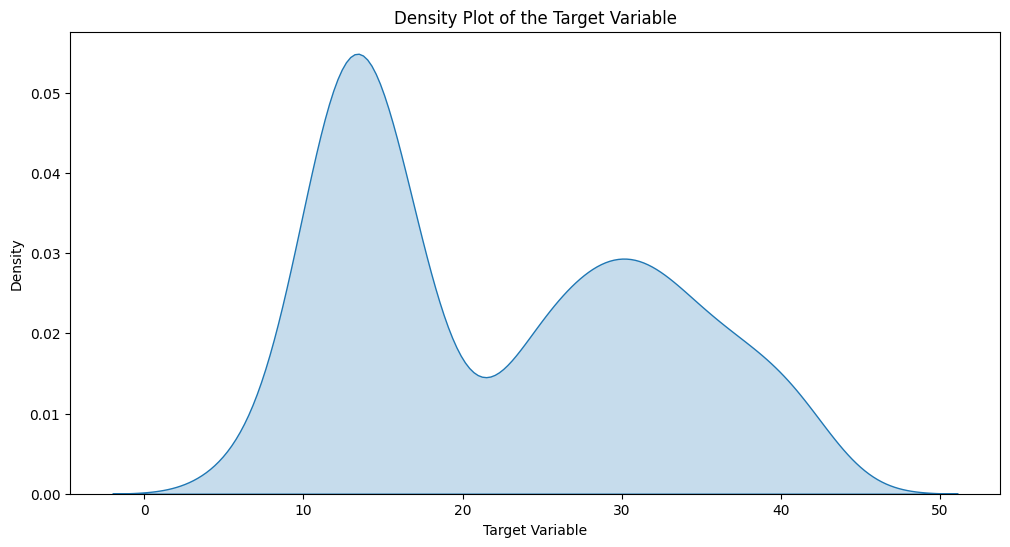

In [17]:
# Step 4: Identify the target variable (replace 'Y1' with the correct target variable)
target_variable = 'Y1'  # Replace with the actual target variable if different

# Step 5: Check if the target variable exists in the dataframe
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataframe.")

# Step 6: Visualize the distribution of the target variable using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df[target_variable], bins=30, kde=True)
plt.title('Distribution of the Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

# Step 7: Visualize the distribution of the target variable using a density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df[target_variable], fill=True)
plt.title('Density Plot of the Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

### TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable

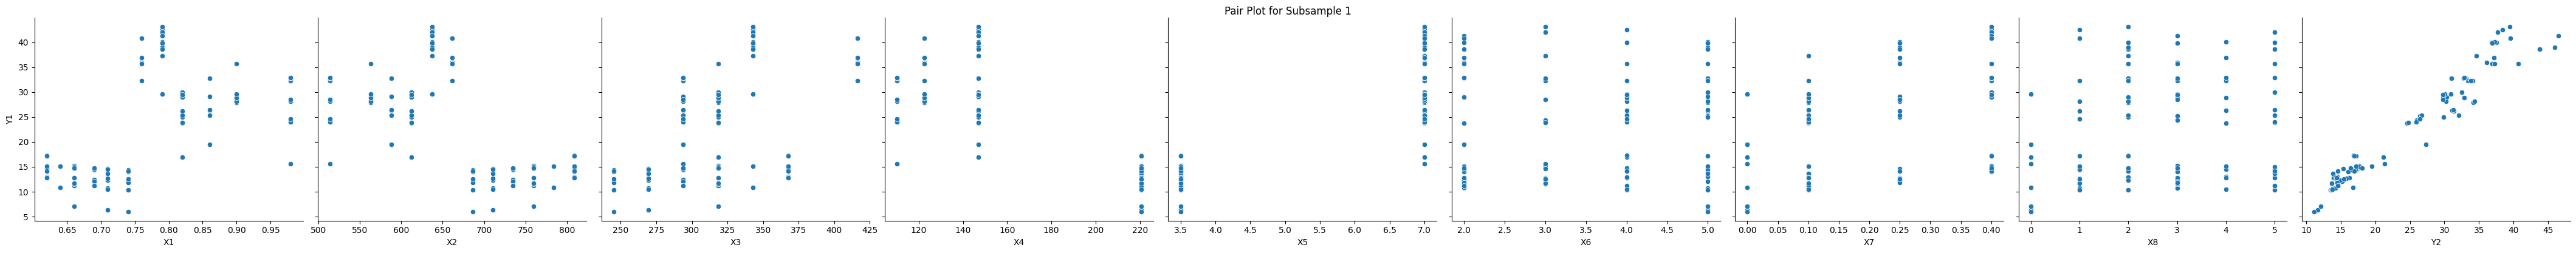

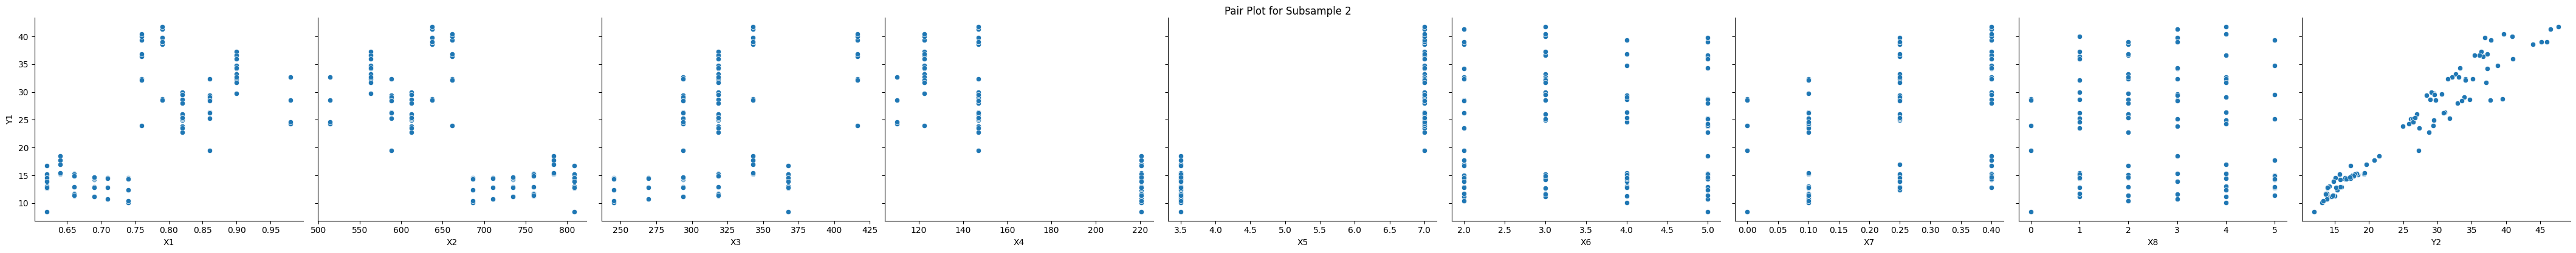

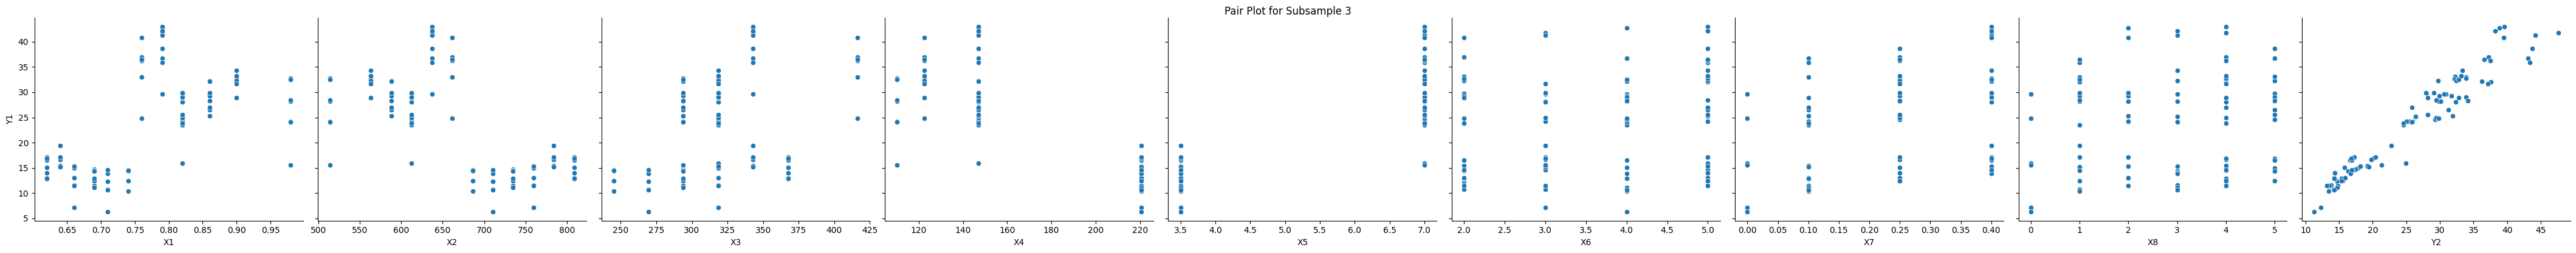

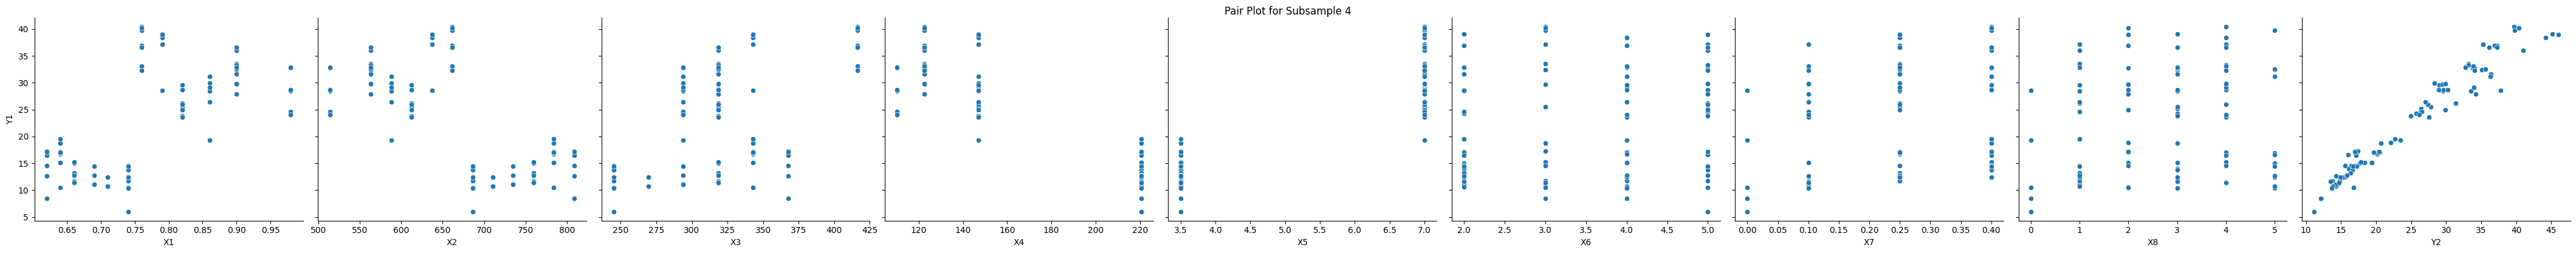

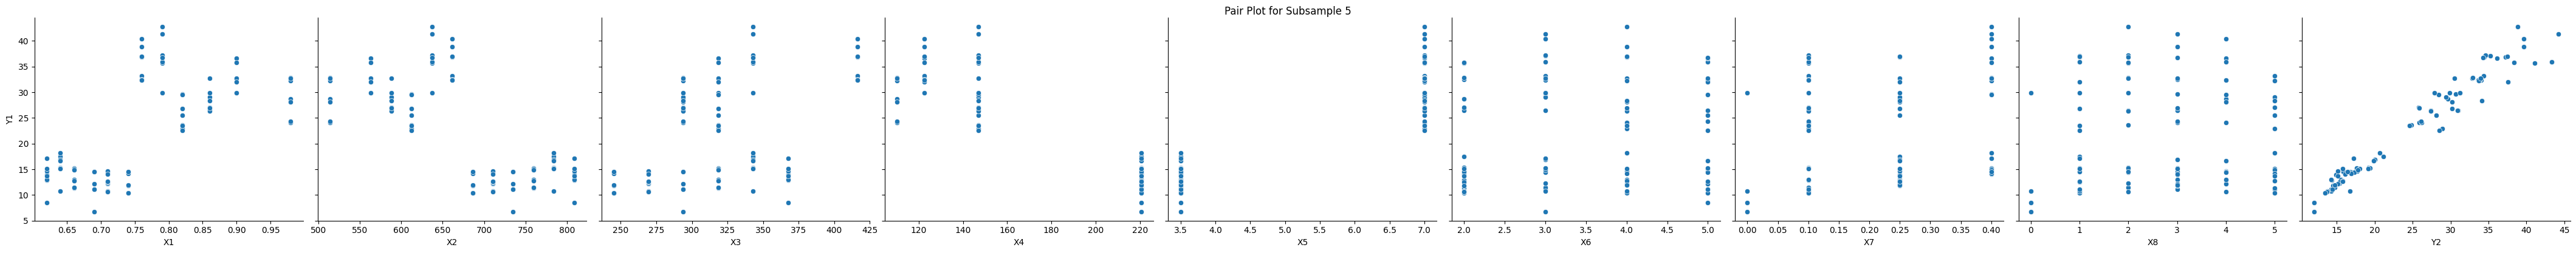

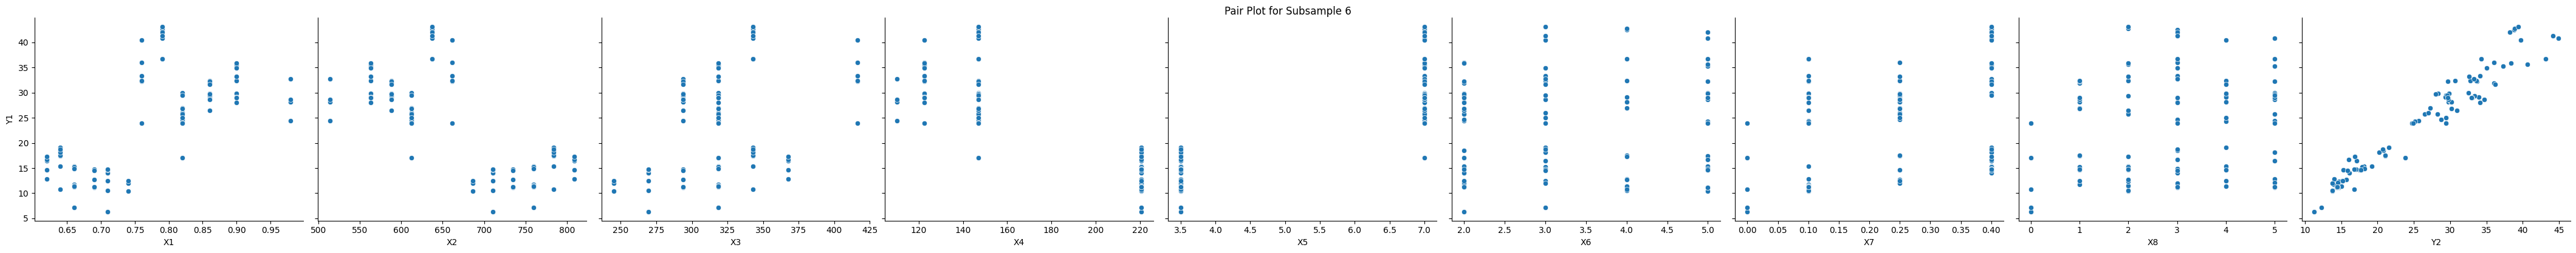

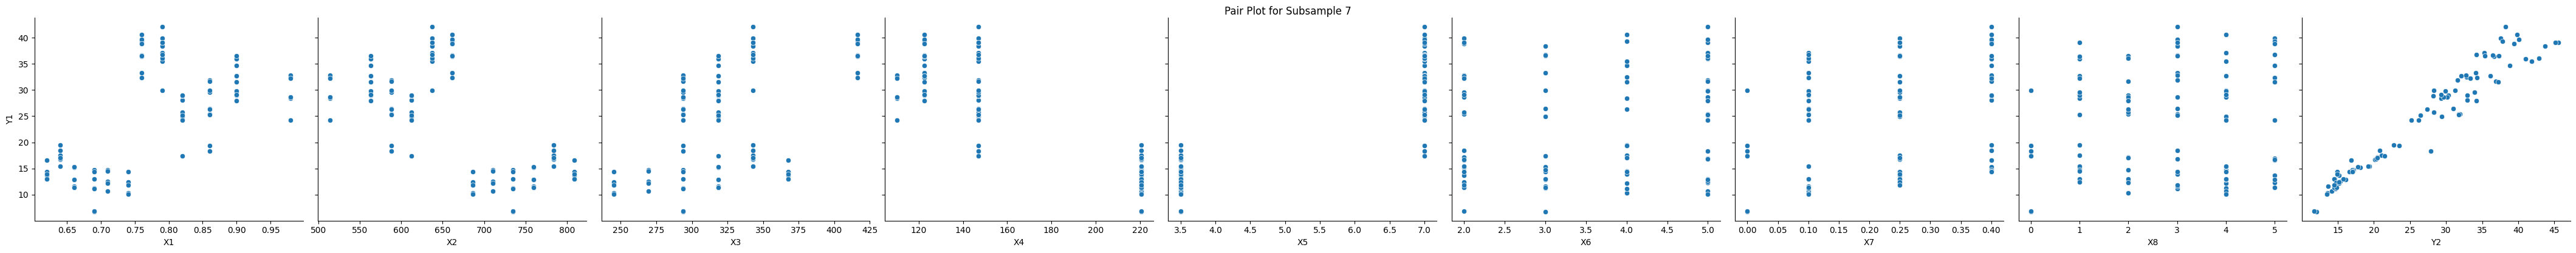

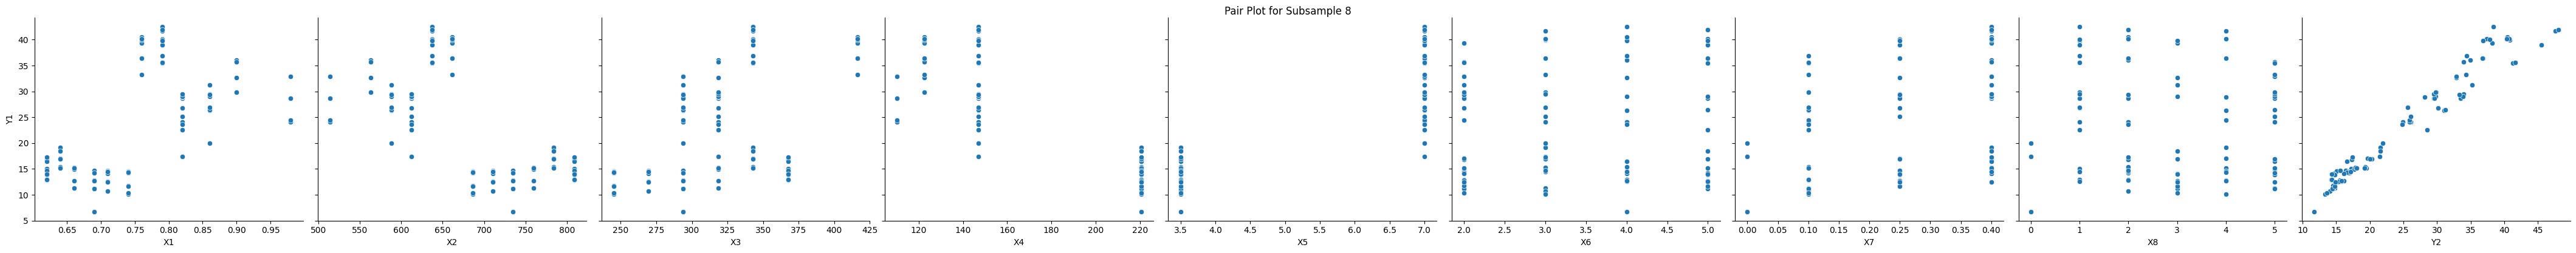

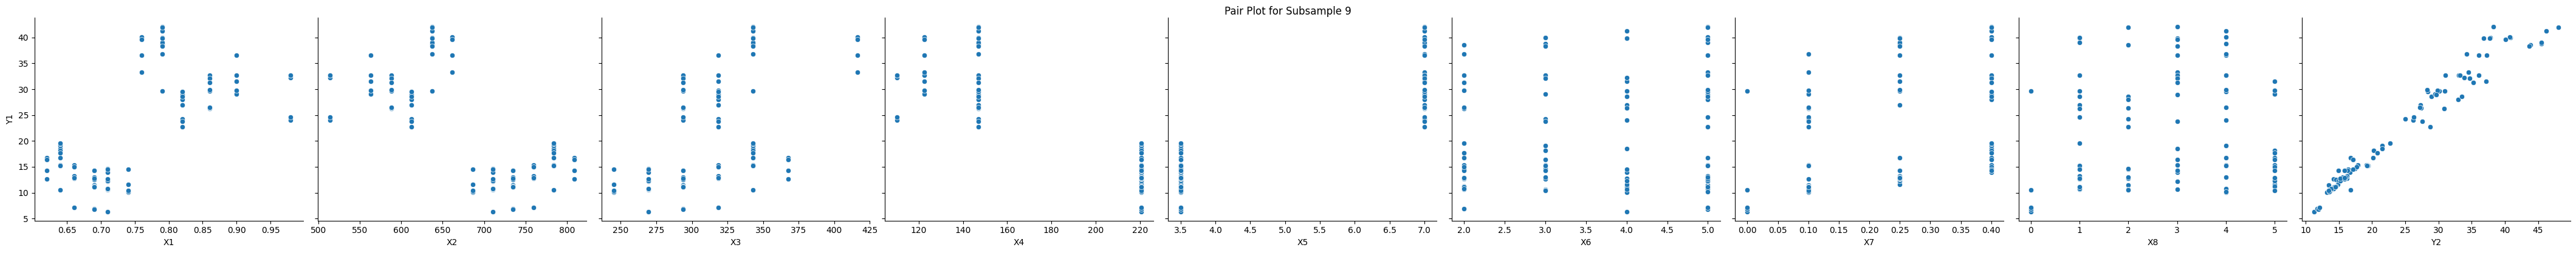

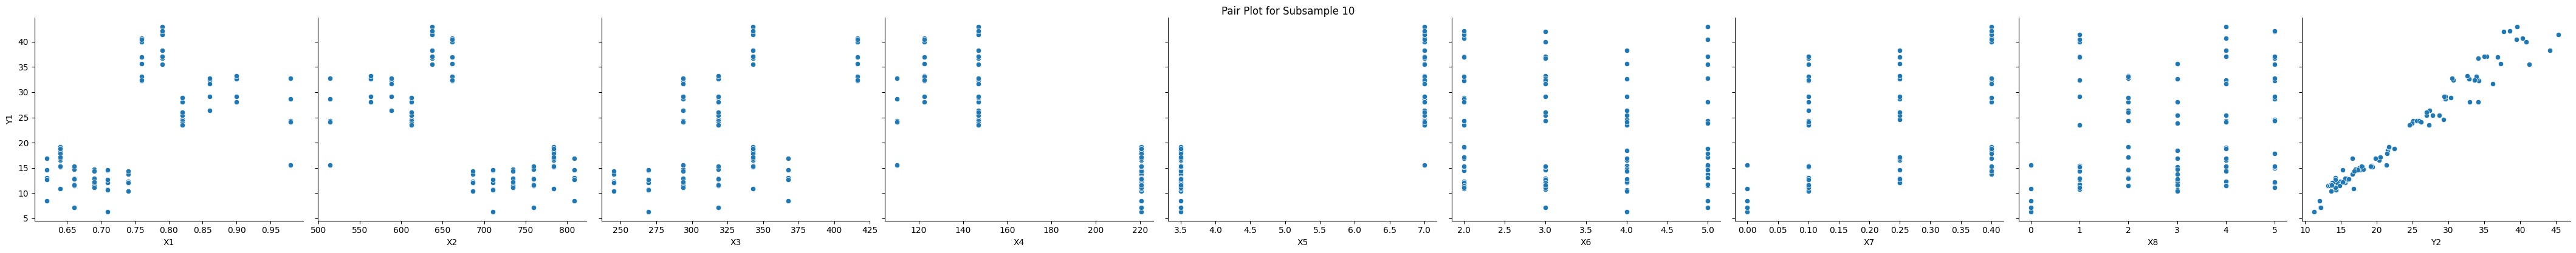

In [13]:

subsamples = []
for i in range(num_subsamples):
    subsample = df.sample(n=subsample_size, random_state=i)
    subsamples.append(subsample)

target_variable = 'Y1'
feature_variables = [col for col in df.columns if col!= target_variable]


for i, subsample in enumerate(subsamples):
    sns.pairplot(subsample, x_vars=feature_variables, y_vars=target_variable, height=4, aspect=1.2)
    plt.suptitle(f'Pair Plot for Subsample {i+1}', y=1.02)
    plt.show()

### TASK: Create a clustermap with seaborn to explore the relationships between variables.



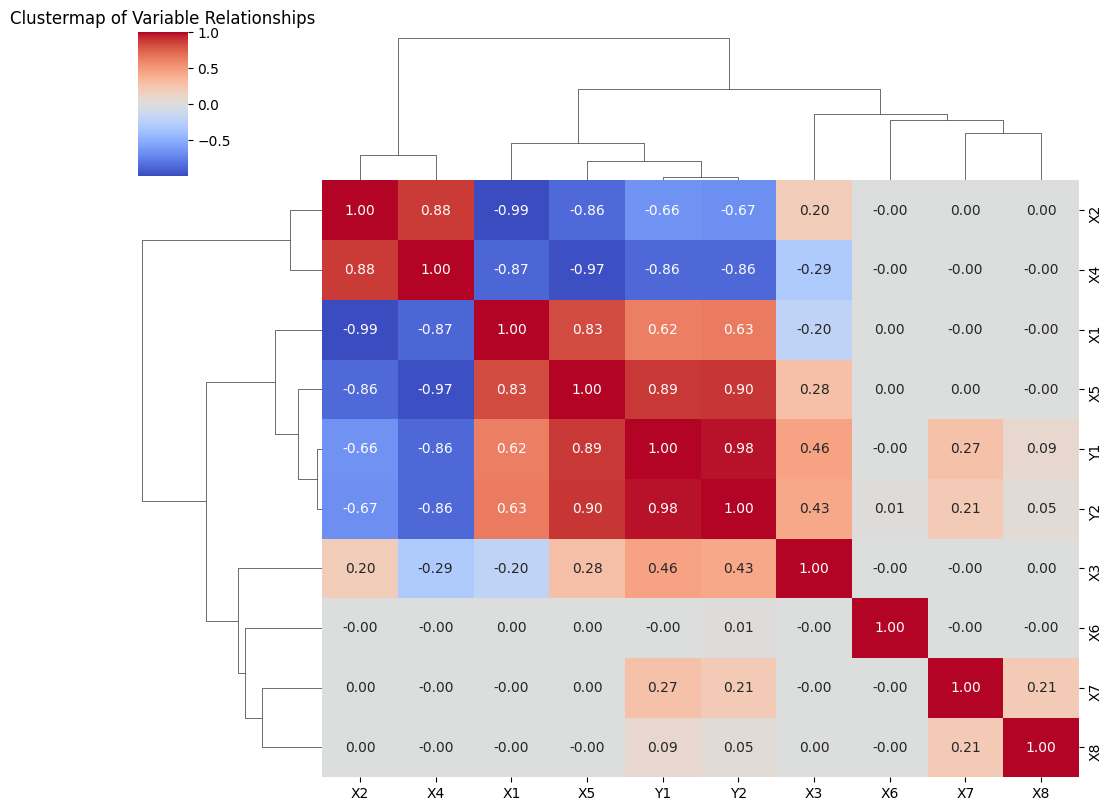

In [14]:
# Create a clustermap
sns.clustermap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", figsize=(10, 8))
plt.title('Clustermap of Variable Relationships')
plt.show()

### TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Y1_encoded'] = le.fit_transform(df['Y1'])
y = df['Y1_encoded']

X = df.drop(columns=['Y1', 'Y2'])  # Features

# Assuming X and y are correctly prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Print the accuracy score
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          24       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         1
          40       0.33      1.00      0.50         1
          41       0.00      0.00      0.00         1
          42       0.00    